#Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd

#Uploading the CSV file

In [2]:
from google.colab import files
uploaded=files.upload()

Saving kidney_disease_dataset.csv to kidney_disease_dataset.csv


#Loading and summarizing the file

In [3]:
dataset=pd.read_csv("kidney_disease_dataset.csv")
print(dataset.shape)
print(dataset.head(5))

(2304, 9)
   Age  Creatinine_Level   BUN  Diabetes  Hypertension   GFR  Urine_Output  \
0   71              0.30  40.9         0             1  46.8        1622.0   
1   34              1.79  17.1         0             0  43.8        1428.0   
2   80              2.67  15.0         0             1  78.2        1015.0   
3   40              0.97  31.1         0             1  92.8        1276.0   
4   43              2.05  22.8         1             1  62.2        1154.0   

   CKD_Status  Dialysis_Needed  
0           1                0  
1           1                0  
2           1                0  
3           1                0  
4           0                0  


#Checking the Missing Values

In [4]:
dataset.isna().any()

,0
Age,False
Creatinine_Level,False
BUN,False
Diabetes,False
Hypertension,False
GFR,False
Urine_Output,False
CKD_Status,False
Dialysis_Needed,False


#Features(Input)

In [34]:
X=dataset.drop('Dialysis_Needed',axis=1)
X.head(5)

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status
0,71,0.30,40.9,0,1,46.8,1622.0,1
1,34,1.79,17.1,0,0,43.8,1428.0,1
2,80,2.67,15.0,0,1,78.2,1015.0,1
3,40,0.97,31.1,0,1,92.8,1276.0,1
4,43,2.05,22.8,1,1,62.2,1154.0,0


#Target(Output)

In [33]:
Y=dataset['Dialysis_Needed']
Y.head(5)

,Dialysis_Needed
0,0
1,0
2,0
3,0
4,0


#Seggregating into Training and Testing data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(1843, 8)
(461, 8)


#Training using Support Vector Machine Algorithm

* SVM is a supervised learning algorithm used for classification and regression tasks.

* It works by finding the optimal hyperplane that best separates different classes.

* Support vectors are the critical data points nearest to the decision boundary.

* SVM aims to maximize the margin between classes to improve generalization.

* It handles both linear and nonlinear problems using kernel functions like linear, RBF, or polynomial.



In [49]:
from sklearn import svm
model=svm.SVC(kernel='rbf')
model.fit(X_train,Y_train)

SVC()

#Prediction using the SVM model

In [50]:
y_pred=model.predict(X_test)
print("Predicted Values using the model")
print(y_pred)
print("Actual and Predicted Values using the model")
print(np.column_stack((Y_test[:5],y_pred[:5])))

Predicted Values using the model
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual and Predicted Values usi

#Evaluation using the SVM model

Accuracy of the model is: 98.48156182212581


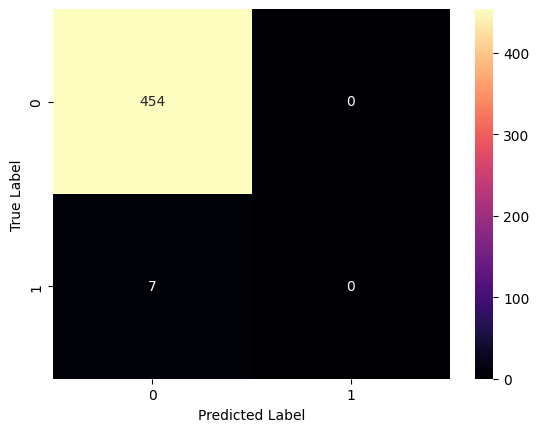

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
Matrix=confusion_matrix(Y_test,y_pred)
print("Accuracy of the model is: {0}".format(accuracy_score(Y_test,y_pred)*100))
sns.heatmap(Matrix, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Prediction for new values of the patient

In [52]:
import pandas as pd

print("\nEnter Patient Details:")

Age = float(input("Age: "))
Creatinine_Level = float(input("Creatinine Level: "))
BUN = float(input("BUN(Blood urea Nitrogen level): "))
Diabetes = int(input("Diabetes (0 = No, 1 = Yes): "))
Hypertension = int(input("Hypertension (0 = No, 1 = Yes): "))
GFR = float(input("GFR(Glomerular Filtration Rate): "))
Urine_Output = float(input("Urine Output: "))
CKD_Status = int(input("CKD Status (0 = No, 1 = Yes): "))

user_input = [[Age, Creatinine_Level, BUN, Diabetes, Hypertension, GFR, Urine_Output, CKD_Status]]
user_input_df = pd.DataFrame(user_input, columns=['Age', 'Creatinine_Level', 'BUN', 'Diabetes', 'Hypertension', 'GFR', 'Urine_Output', 'CKD_Status'])

# Scale the input data (if you used a scaler during training)
user_input_scaled = sc.transform(user_input_df)

# Predict dialysis need
dialysis_prediction = model.predict(user_input_scaled)

if dialysis_prediction[0] == 1:
    print("The patient is likely to NEED dialysis.")
else:
    print("The patient is NOT likely to need dialysis.")


Enter Patient Details:
Age: 71
Creatinine Level: 0.30
BUN(Blood urea Nitrogen level): 40.9
Diabetes (0 = No, 1 = Yes): 0
Hypertension (0 = No, 1 = Yes): 1
GFR(Glomerular Filtration Rate): 46.8
Urine Output: 1622.0
CKD Status (0 = No, 1 = Yes): 1
The patient is NOT likely to need dialysis.


#Checking Model Overfitting

In [55]:
from sklearn.metrics import accuracy_score

# Train the model
model.fit(X_train, Y_train)

# Predict on training data
train_preds = model.predict(X_train)
train_acc = accuracy_score(Y_train, train_preds)

# Predict on test data
test_preds = model.predict(X_test)
test_acc = accuracy_score(Y_test, test_preds)

a=train_acc - test_acc
print(a)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

if a > 0.1:
    print("Warning: The model might be overfitting.")
else:
    print("Model performance looks balanced.")


0.0032473226360396623
Training Accuracy: 0.9881
Test Accuracy: 0.9848
Model performance looks balanced.
